### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### iota_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/iota_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,0.544132,0.646085,0.468949,0.613085,"45,817,500","1,512,430,000"
1,2017-09-04,0.744257,0.744257,0.406795,0.566472,"74,601,300","2,068,680,000"
2,2017-09-03,0.698855,0.775863,0.672850,0.743968,"29,504,600","1,942,490,000"
3,2017-09-02,0.796560,0.802464,0.658006,0.695547,"39,333,900","2,214,060,000"
4,2017-09-01,0.842867,0.879100,0.768119,0.807778,"28,047,000","2,342,770,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          85
Open          85
High          85
Low           85
Close         85
Volume        85
Market Cap    85
dtype: int64

as we can see we have in this file 7 columns and each column has 85 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,85.000000,85.000000,85.000000,85.000000
mean,0.501695,0.537700,0.455827,0.502194
std,0.254753,0.267625,0.232656,0.256240
min,0.157961,0.176099,0.147933,0.158688
25%,0.286164,0.304476,0.262736,0.284565
50%,0.413371,0.437340,0.388231,0.410757
75%,0.722169,0.775863,0.658006,0.721535
max,1.040000,1.100000,0.998241,1.050000


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
Date          85 non-null datetime64[ns]
Open          85 non-null float64
High          85 non-null float64
Low           85 non-null float64
Close         85 non-null float64
Volume        85 non-null object
Market Cap    85 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 4.8+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
80    False
81    False
82    False
83    False
84    False
Length: 85, dtype: bool

as we can see the data fram has 7 columns. each column has 85 cells, and there is no missing data, 
* Volume and Market cap data type are object, we have to convert them to number. 

In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, also we have some missing data in the Market Cap column 
so we have to convert all strings into number and 
     

In [9]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [10]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [11]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01
mean,0.501695,0.537700,0.455827,0.502194,1.589207e+07,1.394773e+09
std,0.254753,0.267625,0.232656,0.256240,1.749176e+07,7.087087e+08
min,0.157961,0.176099,0.147933,0.158688,2.334640e+06,4.390570e+08
25%,0.286164,0.304476,0.262736,0.284565,3.913220e+06,7.954020e+08
50%,0.413371,0.437340,0.388231,0.410757,8.233640e+06,1.148980e+09
75%,0.722169,0.775863,0.658006,0.721535,2.035800e+07,2.007290e+09
max,1.040000,1.100000,0.998241,1.050000,8.469830e+07,2.904020e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
Date          85 non-null datetime64[ns]
Open          85 non-null float64
High          85 non-null float64
Low           85 non-null float64
Close         85 non-null float64
Volume        85 non-null int64
Market Cap    85 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 4.8 KB


In [13]:
df[df['Market Cap'].isnull()].head()

,Date,Open,High,Low,Close,Volume,Market Cap


In [14]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.989865,0.975198,0.975271,0.741065,0.999997
High,0.989865,1.000000,0.979847,0.990364,0.767232,0.989837
Low,0.975198,0.979847,1.000000,0.988365,0.665404,0.975142
Close,0.975271,0.990364,0.988365,1.000000,0.731330,0.975158
Volume,0.741065,0.767232,0.665404,0.731330,1.000000,0.741437
Market Cap,0.999997,0.989837,0.975142,0.975158,0.741437,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


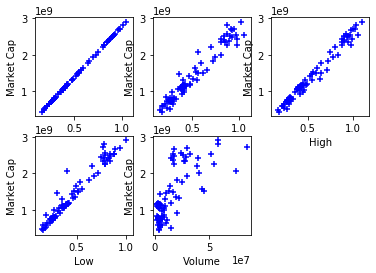

In [15]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [16]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [17]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Model Score
model.score(Open, Market_Cap)

0.9999934524528358

#### 4. Data Visualization

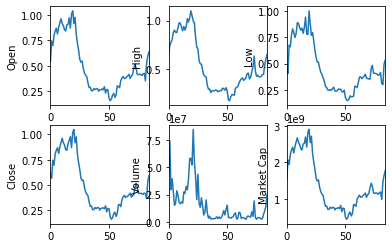

In [20]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()